In [4]:
import PyGol as pygol
import numpy as np
import pandas as pd
import pickle

df = pd.read_csv('phishing_dataset.csv')
# remove serial no column
df = df.drop("Unnamed: 0", axis=1)


feature_cols=df.columns[:-1]
target_col=df.columns[-1]
X = df.values[:,0:-1]
y = df.values[:,-1]

In [6]:
Train_P, Test_P, Train_N, Test_N=pygol.pygol_train_test_split(
                                    test_size=0.20, 
                                    positive_file_dictionary="generated/Neg_BC",
                                    negative_file_dictionary="generated/Pos_BC"
                                )
model= pygol.pygol_learn(
            Train_P, Train_N, file="generated/BK.pl",
            max_literals=2, exact_literals=True, 
            key_size=1, min_pos=50, max_neg=50
        )
metrics=pygol.evaluate_theory_prolog(model.hypothesis,"generated/BK.pl",Test_P, Test_N)

100%|██████████| 3918/3918 [04:33<00:00, 14.34it/s]


+----------+ Hypothesis +----------+
['target(A):-sslfinal_state(A,1),url_of_anchor(A,1)', 'target(A):-abnormal_url(A,-1),links_pointing_to_page(A,-1)', 'target(A):-rightclick(A,-1),url_length(A,1)', 'target(A):-iframe(A,-1),port(A,1)', 'target(A):-sfh(A,0),submitting_to_email(A,-1)', 'target(A):-popupwidnow(A,-1),sfh(A,0)', 'target(A):-having_at_symbol(A,-1),sfh(A,0)', 'target(A):-links_pointing_to_page(A,-1),shortining_service(A,-1)', 'target(A):-links_in_tags(A,1),links_pointing_to_page(A,-1)', 'target(A):-links_pointing_to_page(A,-1),submitting_to_email(A,-1)', 'target(A):-links_pointing_to_page(A,-1),page_rank(A,1)', 'target(A):-links_pointing_to_page(A,-1),sfh(A,1)', 'target(A):-having_sub_domain(A,-1),sfh(A,0)', 'target(A):-links_pointing_to_page(A,-1),url_length(A,1)', 'target(A):-links_in_tags(A,1),sfh(A,0)', 'target(A):-having_sub_domain(A,1),rightclick(A,-1)', 'target(A):-links_pointing_to_page(A,-1),prefix_suffix(A,1)', 'target(A):-iframe(A,-1),sfh(A,1)', 'target(A):-age_of

# Typical Machine Learning

In [8]:
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import  svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Naive Bayes: 0.605518 (0.011522)
SVM: 0.917956 (0.007689)
DT: 0.952329 (0.030973)
Perc.: 0.905925 (0.012583)
MLP: 0.921755 (0.004035)
PyGol: 0.820000 (0.000000)


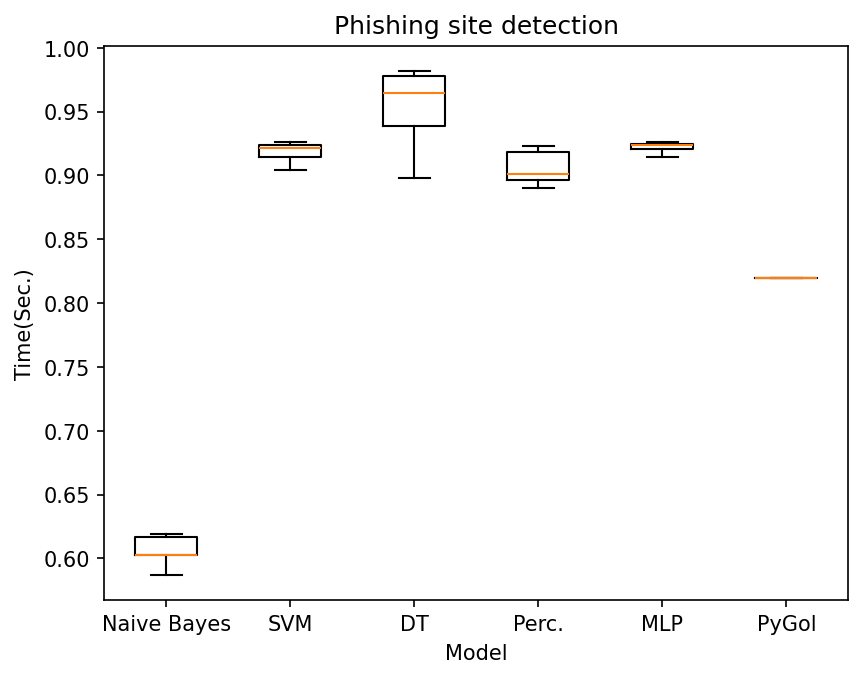

In [28]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', svm.SVC(gamma=0.001)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('Perc.', Perceptron(eta0=0.1, random_state=0, max_iter=1000)))
models.append(('MLP', MLPClassifier( activation='logistic', hidden_layer_sizes=(1000,), max_iter=1000)))
results = []
names = []
means_set=[]
error_set=[]
for name, model in models:
    cv_results = cross_val_score(model, X, y, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    means_set.append(cv_results.mean())
    error_set.append(cv_results.std())
print('%s: %f (%f)' % ("PyGol", np.mean(metrics.accuracy), np.std(metrics.accuracy)))

fig = pyplot.figure(dpi=150)
results.append(np.array(metrics.accuracy))
means_set.append(np.mean(metrics.accuracy))
error_set.append(np.std(metrics.accuracy))
names.append("PyGol")
pyplot.boxplot(results, labels=names)
pyplot.ylabel('Time(Sec.)')
pyplot.xlabel('Model')
pyplot.title('Phishing site detection')
pyplot.show()

In [20]:
results[-1]= np.array([0.82])

In [24]:
results

[array([0.60244233, 0.60244233, 0.61691542, 0.61872456, 0.58706468]),
 array([0.91451832, 0.923564  , 0.92130258, 0.90456807, 0.92582542]),
 array([0.98055179, 0.97783808, 0.96336499, 0.9375848 , 0.9063772 ]),
 array([0.90140208, 0.92311171, 0.91813659, 0.89054726, 0.89642696]),
 array([0.97783808, 0.92989597, 0.92853912, 0.91904116, 0.91587517]),
 array(0.82)]

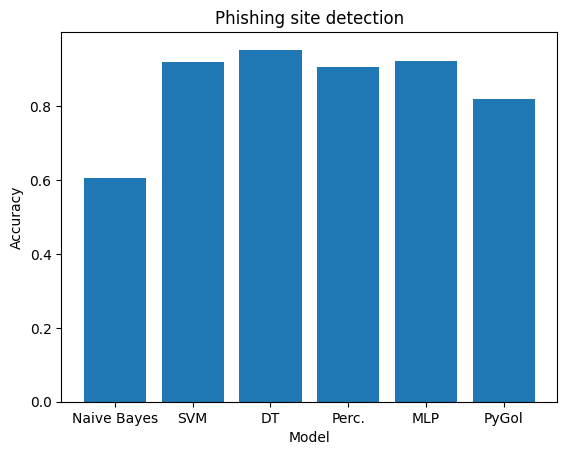

In [29]:
pyplot.bar(names, means_set)
pyplot.ylabel('Accuracy')
pyplot.xlabel('Model')
pyplot.title('Phishing site detection')
pyplot.show()